In [1]:
# SEZIONE 1 - Import e setup iniziale
# --------------------------------------------------

import os
import re
from pathlib import Path
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import stanza
import cltk

from cltk import NLP
from gensim import corpora, models
from geopy.geocoders import Nominatim

print("Tutte le librerie caricate correttamente.")


c:\Users\chris\OneDrive\Desktop\Python tezt\crypy\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Tutte le librerie caricate correttamente.


In [2]:
import stanza
stanza.download("la")


2025-08-08 01:37:29 INFO: Downloaded file to C:\Users\chris\stanza_resources\resources.json
2025-08-08 01:37:29 INFO: Downloading default packages for language: la (Latin) ...
2025-08-08 01:37:30 INFO: File exists: C:\Users\chris\stanza_resources\la\default.zip
2025-08-08 01:37:32 INFO: Finished downloading models and saved to C:\Users\chris\stanza_resources


In [3]:
# SEZIONE 2 - Percorsi testi
# --------------------------------------------------

CORPUS_DIR = Path("lat_text_latin_library-master")
FILE1 = CORPUS_DIR / "justinian" / "institutes1.txt"
FILE2 = CORPUS_DIR / "erasmus" / "querela.txt"

print(f"Testo 1: {FILE1}")
print(f"Testo 2: {FILE2}")


Testo 1: lat_text_latin_library-master\justinian\institutes1.txt
Testo 2: lat_text_latin_library-master\erasmus\querela.txt


In [4]:
# SEZIONE 3 - Funzioni per analizzare il testo
# --------------------------------------------------

def read_text(filepath):
    with open(filepath, encoding="utf-8") as f:
        return f.read()

nlp = NLP(language="lat")

def analyze_text(text):
    doc = nlp(text)

    tokens = doc.tokens  # è una lista di stringhe
    lemmas = doc.lemmata  # lista dei lemmi
    pos_tags = doc.pos     # lista di POS tags
    
    # Non esiste doc.entities, quindi entità vuote
    entities = []
    
    sentences = doc.sentences_strings  # lista di frasi come stringhe

    return {
        "tokens": tokens,
        "lemmas": lemmas,
        "pos_tags": pos_tags,
        "entities": entities,
        "sentences": sentences,
        "doc": doc,
    }


def extract_dates(text):
    date_patterns = [
        r"Anno Domini [MDCLXVI]+",
        r"Idibus [A-Za-z]+",
        r"[KLXVI]+\s+Kalendas\s+[A-Za-z]+",
    ]
    matches = []
    for pat in date_patterns:
        matches.extend(re.findall(pat, text, flags=re.IGNORECASE))
    return matches

def word_frequencies(tokens):
    return Counter(tokens)

def plot_top_frequencies(freqs, title, top_n=20):
    most_common = freqs.most_common(top_n)
    words, counts = zip(*most_common)
    plt.figure(figsize=(10,6))
    plt.bar(words, counts)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.tight_layout()
    plt.show()

def topic_modeling(lemmas, num_topics=5, passes=15):
    dictionary = corpora.Dictionary([lemmas])
    corpus = [dictionary.doc2bow(lemmas)]
    lda = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=passes)
    topics = lda.print_topics()
    return lda, topics

def geolocate_entities(entities):
    geolocator = Nominatim(user_agent="latin_text_analysis")
    locations = defaultdict(list)
    for ent, ent_type in entities:
        if ent_type in ("LOC", "GPE", "ORG"):
            try:
                loc = geolocator.geocode(ent)
                if loc:
                    locations[ent_type].append((ent, loc.latitude, loc.longitude))
            except Exception:
                continue
    return locations

def plot_timeline(dates1, dates2, labels=("Testo1","Testo2")):
    plt.figure(figsize=(12,4))
    plt.hist([dates1, dates2], label=labels, bins=30)
    plt.legend()
    plt.title("Distribuzione Date Estratte")
    plt.show()



‎𐤀 CLTK version '1.5.0'. When using the CLTK in research, please cite: https://aclanthology.org/2021.acl-demo.3/

Pipeline for language 'Latin' (ISO: 'lat'): `LatinNormalizeProcess`, `LatinStanzaProcess`, `LatinEmbeddingsProcess`, `StopsProcess`, `LatinLexiconProcess`.

⸖ ``LatinStanzaProcess`` using Stanza model from the Stanford NLP Group: https://stanfordnlp.github.io/stanza/ . Please cite: https://arxiv.org/abs/2003.07082
⸖ ``LatinEmbeddingsProcess`` using word2vec model by University of Oslo from http://vectors.nlpl.eu/ . Please cite: https://aclanthology.org/W17-0237/
⸖ ``LatinLexiconProcess`` using Lewis's *An Elementary Latin Dictionary* (1890).

⸎ To suppress these messages, instantiate ``NLP()`` with ``suppress_banner=True``.


In [5]:
nlp = NLP(language="lat")

‎𐤀 CLTK version '1.5.0'. When using the CLTK in research, please cite: https://aclanthology.org/2021.acl-demo.3/

Pipeline for language 'Latin' (ISO: 'lat'): `LatinNormalizeProcess`, `LatinStanzaProcess`, `LatinEmbeddingsProcess`, `StopsProcess`, `LatinLexiconProcess`.

⸖ ``LatinStanzaProcess`` using Stanza model from the Stanford NLP Group: https://stanfordnlp.github.io/stanza/ . Please cite: https://arxiv.org/abs/2003.07082
⸖ ``LatinEmbeddingsProcess`` using word2vec model by University of Oslo from http://vectors.nlpl.eu/ . Please cite: https://aclanthology.org/W17-0237/
⸖ ``LatinLexiconProcess`` using Lewis's *An Elementary Latin Dictionary* (1890).

⸎ To suppress these messages, instantiate ``NLP()`` with ``suppress_banner=True``.


In [5]:
import time
from cltk import NLP

start = time.time()
nlp = NLP(language="lat")  # se è già stato importato prima, sarà più veloce
doc = nlp.analyze("In principio creavit Deus caelum et terram.")  # frase breve di prova
end = time.time()

print("Tempo impiegato:", round(end - start, 2), "secondi")


‎𐤀 CLTK version '1.5.0'. When using the CLTK in research, please cite: https://aclanthology.org/2021.acl-demo.3/

Pipeline for language 'Latin' (ISO: 'lat'): `LatinNormalizeProcess`, `LatinStanzaProcess`, `LatinEmbeddingsProcess`, `StopsProcess`, `LatinLexiconProcess`.

⸖ ``LatinStanzaProcess`` using Stanza model from the Stanford NLP Group: https://stanfordnlp.github.io/stanza/ . Please cite: https://arxiv.org/abs/2003.07082
⸖ ``LatinEmbeddingsProcess`` using word2vec model by University of Oslo from http://vectors.nlpl.eu/ . Please cite: https://aclanthology.org/W17-0237/
⸖ ``LatinLexiconProcess`` using Lewis's *An Elementary Latin Dictionary* (1890).

⸎ To suppress these messages, instantiate ``NLP()`` with ``suppress_banner=True``.
Tempo impiegato: 41.71 secondi


*** Analisi per Giustiniano - Institutes1 (institutes1.txt) ***
Lunghezza testo: 58506 caratteri
Unrecognized UD feature 'Compound' with value 'Yes'.
If you believe this is not an error in the dependency parser, please raise an issue at <https://github.com/cltk/cltk/issues> and include a short text to reproduce the error.

Unrecognized UD feature 'Compound' with value 'Yes'.
If you believe this is not an error in the dependency parser, please raise an issue at <https://github.com/cltk/cltk/issues> and include a short text to reproduce the error.

Unrecognized UD feature 'Compound' with value 'Yes'.
If you believe this is not an error in the dependency parser, please raise an issue at <https://github.com/cltk/cltk/issues> and include a short text to reproduce the error.

Unrecognized UD feature 'Compound' with value 'Yes'.
If you believe this is not an error in the dependency parser, please raise an issue at <https://github.com/cltk/cltk/issues> and include a short text to reproduce the

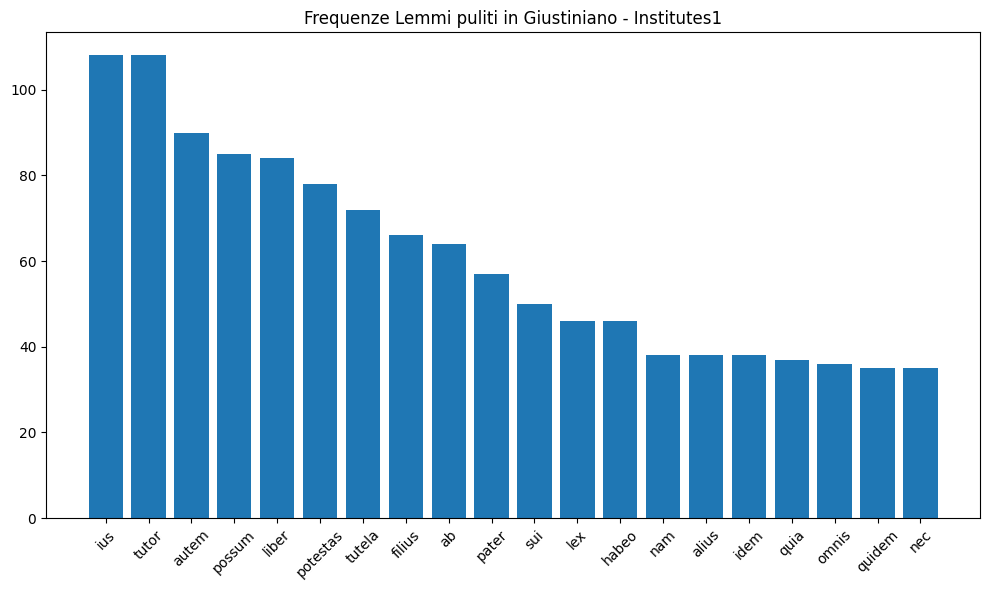

In [6]:
# Lista base di stopwords latine
latin_stopwords = {
    'et','i', 'in', 'de', 'non', 'ad', 'per', 'cum', 'ex', 'atque',
    'aut', 'sed', 'ut', 'si', 'sicut', 'qui', 'quae', 'quod',
    'is', 'ea', 'id', 'ego', 'tu', 'nos', 'vos', 'hic', 'ille','vel','sum', 'do', 'suus'
    # Aggiungi altre stopwords se vuoi
}

def clean_lemmas(lemmas):
    cleaned = [
        lemma.lower() for lemma in lemmas
        if lemma.isalpha() and lemma.lower() not in latin_stopwords
    ]
    return cleaned



def analyze_and_report(file_path, label):
    print(f"*** Analisi per {label} ({file_path.name}) ***")

    text = read_text(file_path)
    print(f"Lunghezza testo: {len(text)} caratteri")

    result = analyze_text(text)

    # Pulizia lemmi
    cleaned_lemmas = clean_lemmas(result["lemmas"])

    dates = extract_dates(text)
    print(f"Date estratte: {dates[:5]}{'...' if len(dates) > 5 else ''}")

    freqs = word_frequencies(cleaned_lemmas)
    print(f"Parole più comuni: {freqs.most_common(10)}")

    entities = result["entities"]
    print(f"Prime entità nominate: {entities[:5]}")

    plot_top_frequencies(freqs, f"Frequenze Lemmi puliti in {label}")

    return {
    "text": text,
    "lemmas": cleaned_lemmas,
    "entities": entities,
    "dates": dates,
    "freqs": freqs,
    "doc": result["doc"],
    }
# Eseguiamo solo il primo file
data1 = analyze_and_report(FILE1, "Giustiniano - Institutes1")

In [7]:
from collections import Counter
def stylistic_analysis(doc):
    sentences = doc.sentences
    tokens = doc.words  # usa words, non tokens, perché words ha gli oggetti Word
    
    lunghezza_media_frasi = sum(len(sent.words) for sent in sentences) / len(sentences)
    lunghezza_media_parole = sum(len(word.string) for word in tokens) / len(tokens)
    
    print(f"Lunghezza media delle frasi: {lunghezza_media_frasi:.2f} parole")
    print(f"Lunghezza media delle parole: {lunghezza_media_parole:.2f} caratteri")



In [29]:
from collections import Counter
from cltk.core.exceptions import CLTKException

def morphosyntactic_analysis(doc):
    tempi = Counter()
    modi = Counter()
    voci = Counter()
    forme = Counter()
    count_verbi = 0
    dettagli = []  # per la stampa a schermo

    for word in doc.words:
        try:
            verb_form = word.features["VerbForm"]
            forme[", ".join(str(v) for v in verb_form)] += 1

            # Se è un verbo finito
            if any(str(v).lower() == "finite" for v in verb_form):
                try:
                    tense = str(word.features["Tense"][0])
                except (CLTKException, KeyError, IndexError):
                    tense = "None"

                try:
                    mood = str(word.features["Mood"][0])
                except (CLTKException, KeyError, IndexError):
                    mood = "None"

                try:
                    voice = str(word.features["Voice"][0])
                except (CLTKException, KeyError, IndexError):
                    voice = "None"

                tempi[tense] += 1
                modi[mood] += 1
                voci[voice] += 1
                count_verbi += 1

                dettagli.append([
                    word.string,
                    getattr(word, "lemma", ""),
                    word.upos,
                    ", ".join(str(v) for v in verb_form),
                    tense,
                    mood,
                    voice
                ])

        except (CLTKException, KeyError):
            forme["None"] += 1

    # Statistiche
    print(f"Totale verbi (tutte le forme): {sum(forme.values())}")
    print(f"Distribuzione forme verbali: {dict(forme)}\n")
    print(f"Verbi finiti analizzati: {count_verbi}")
    print(f"Distribuzione tempi verbali: {dict(tempi)}")
    print(f"Distribuzione modi verbali: {dict(modi)}")
    print(f"Distribuzione voci verbali: {dict(voci)}")

    # Elenco dettagliato
    print("\nElenco verbi finiti:")
    print(f"{'Token':<15} {'Lemma':<15} {'UPOS':<8} {'VerbForm':<20} {'Tense':<8} {'Mood':<10} {'Voice':<8}")
    print("-" * 90)
    for token, lemma, upos, vform, tense, mood, voice in dettagli:
        print(f"{token:<15} {lemma:<15} {upos:<8} {vform:<20} {tense:<8} {mood:<10} {voice:<8}")


In [9]:
import unidecode

def clean_lemmas(lemmas):
    lemmi_puliti = [unidecode.unidecode(l).lower() for l in lemmas if l.isalpha()]
    return lemmi_puliti


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

def plot_cumulative_freq(freqs):
    counts = np.array(sorted(freqs.values(), reverse=True))
    cumulative = np.cumsum(counts) / sum(counts)
    plt.plot(cumulative)
    plt.title("Curva di frequenza cumulativa")
    plt.xlabel("Lemmi ordinati per frequenza")
    plt.ylabel("Frequenza cumulativa")
    plt.show()

def plot_similarity_matrix(freqs1, freqs2):
    all_lemmas = list(set(freqs1.keys()).union(set(freqs2.keys())))
    vec1 = np.array([freqs1.get(l, 0) for l in all_lemmas]).reshape(1, -1)
    vec2 = np.array([freqs2.get(l, 0) for l in all_lemmas]).reshape(1, -1)
    sim = cosine_similarity(vec1, vec2)[0][0]
    print(f"Similarità cosine tra testi: {sim:.3f}")

    data = np.vstack([vec1, vec2])
    sns.heatmap(data, annot=True, xticklabels=all_lemmas)
    plt.title("Heatmap frequenze lemmi testi")
    plt.show()


Totale verbi (tutte le forme): 9866
Distribuzione forme verbali: {'None': 7928, 'infinitive': 304, 'finite': 1173, 'participle': 461}

Verbi finiti analizzati: 1173
Distribuzione tempi verbali: {'present': 875, 'past': 228, 'future': 48, 'pluperfect': 19, 'None': 3}
Distribuzione modi verbali: {'indicative': 934, 'subjunctive': 233, 'imperative': 3, 'None': 3}
Distribuzione voci verbali: {'active': 564, 'None': 363, 'passive': 246}

Elenco verbi finiti:
Token           Lemma           UPOS     VerbForm             Tense    Mood       Voice   
------------------------------------------------------------------------------------------
possunt         possum          VERB     finite               present  indicative active  
sunt            sum             AUX      finite               present  indicative None    
solvitur        solvo           VERB     finite               present  indicative passive 
possunt         possum          VERB     finite               present  indicative activ

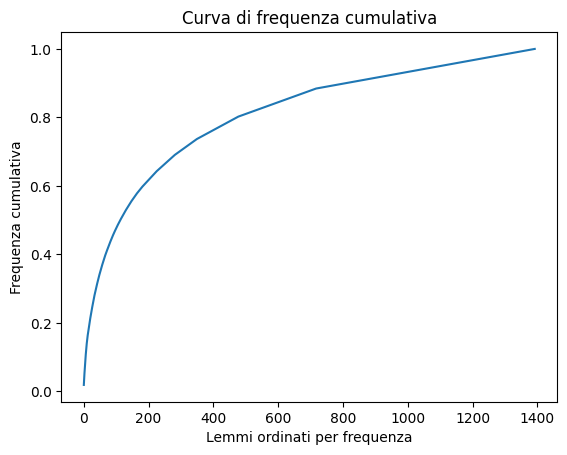

In [30]:
doc = data1["doc"]
freqs = data1["freqs"]

# Analisi morfosintattica
morphosyntactic_analysis(doc)

# Analisi stilistica
stylistic_analysis(doc)

# Curva cumulativa frequenze
plot_cumulative_freq(freqs)

# Confronto con se stesso (esempio)
#plot_similarity_matrix(freqs, freqs) DA UTILIZZARE CON SECONDO TESTO 



In [32]:
for word in doc.words:
    if word.upos == "VERB":
        # Prova a prendere il valore di VerbForm usando l'accesso diretto, se c'è
        verb_form = word.features["VerbForm"] if "VerbForm" in word.features else None
        if verb_form is None or verb_form == []:
            print(f"Verbo senza VerbForm: {word.string} - features: {word.features}")



Verbo senza VerbForm: manumittere - features: {Aspect: [imperfective], InflClass: [lat_x], VerbForm: [infinitive], Voice: [active]}
Verbo senza VerbForm: possunt - features: {Aspect: [imperfective], InflClass: [lat_anom], Mood: [indicative], Number: [plural], Person: [third], Tense: [present], VerbForm: [finite], Voice: [active]}
Verbo senza VerbForm: sublata - features: {Aspect: [perfective], Case: [ablative], Gender: [feminine], InflClass: [lat_x, nominal], Number: [singular], VerbForm: [participle], Voice: [passive]}
Verbo senza VerbForm: solvitur - features: {Aspect: [imperfective], InflClass: [lat_x], Mood: [indicative], Number: [singular], Person: [third], Tense: [present], VerbForm: [finite], Voice: [passive]}
Verbo senza VerbForm: dari - features: {Aspect: [imperfective], InflClass: [lat_a], VerbForm: [infinitive], Voice: [passive]}
Verbo senza VerbForm: possunt - features: {Aspect: [imperfective], InflClass: [lat_anom], Mood: [indicative], Number: [plural], Person: [third], Te

In [15]:
count = 0
for word in doc.words:
    if word.upos == "VERB":
        print(f"{word.string} - features: {word.features}")
        count += 1
        if count >= 10:
            break


manumittere - features: {Aspect: [imperfective], InflClass: [lat_x], VerbForm: [infinitive], Voice: [active]}
possunt - features: {Aspect: [imperfective], InflClass: [lat_anom], Mood: [indicative], Number: [plural], Person: [third], Tense: [present], VerbForm: [finite], Voice: [active]}
sublata - features: {Aspect: [perfective], Case: [ablative], Gender: [feminine], InflClass: [lat_x, nominal], Number: [singular], VerbForm: [participle], Voice: [passive]}
solvitur - features: {Aspect: [imperfective], InflClass: [lat_x], Mood: [indicative], Number: [singular], Person: [third], Tense: [present], VerbForm: [finite], Voice: [passive]}
dari - features: {Aspect: [imperfective], InflClass: [lat_a], VerbForm: [infinitive], Voice: [passive]}
possunt - features: {Aspect: [imperfective], InflClass: [lat_anom], Mood: [indicative], Number: [plural], Person: [third], Tense: [present], VerbForm: [finite], Voice: [active]}
adgnatorum - features: {Aspect: [perfective], Case: [genitive], Gender: [neuter

In [18]:
for word in doc.words[:100]:
    print(word.string, word.upos, word.features)



The NOUN {Gender: [masculine], Number: [singular]}
Institutes NOUN {Case: [nominative], Gender: [feminine], InflClass: [ind_eur_x], Number: [plural]}
of NUM {}
Justinian NOUN {Case: [nominative], Gender: [feminine], InflClass: [ind_eur_o], Number: [singular]}
, PUNCT {}
Book NOUN {Abbreviation: [pos]}
1 NUM {}
IMPERATORIS NOUN {Case: [nominative], Gender: [masculine], InflClass: [ind_eur_x], Number: [singular]}
IVSTINIANI NOUN {Case: [genitive], Gender: [masculine], InflClass: [ind_eur_x], Number: [singular]}
INSTITVTIONVM ADJ {Case: [genitive], Degree: [comparative], Gender: [neuter], InflClass: [ind_eur_x], Number: [singular]}
LIBER NOUN {Case: [nominative], Gender: [masculine], InflClass: [ind_eur_x], Number: [singular]}
PRIMV NOUN {Abbreviation: [pos], Proper: [yes]}
S NUM {}
LIBER NOUN {Case: [nominative], Gender: [masculine], InflClass: [ind_eur_x], Number: [singular]}
PRIMUS ADJ {Case: [nominative], Gender: [masculine], InflClass: [ind_eur_o], Numeral: [ordinal], Number: [singul

In [24]:
from cltk.core.exceptions import CLTKException

for word in doc.words:
    try:
        vf = word.features["VerbForm"]
        print(word.string, word.upos, vf)
    except CLTKException:
        pass



manumittere VERB [infinitive]
possunt VERB [finite]
sublata VERB [participle]
sunt AUX [finite]
solvitur VERB [finite]
dari VERB [infinitive]
possunt VERB [finite]
adgnatorum VERB [participle]
dabatur VERB [finite]
finitur VERB [finite]
curatorum VERB [participle]
curatorum VERB [participle]
suspectis VERB [participle]
est AUX [finite]
constans VERB [participle]
tribuens VERB [participle]
est AUX [finite]
cognitis VERB [participle]
incipientibus VERB [participle]
exponere VERB [infinitive]
videntur VERB [finite]
posse VERB [infinitive]
tradi VERB [infinitive]
diligentissima VERB [participle]
tradantur VERB [finite]
oneraverimus VERB [finite]
efficiemus VERB [finite]
avertit VERB [finite]
perducemus VERB [finite]
ductus VERB [participle]
perduci VERB [infinitive]
potuisset VERB [finite]
sunt AUX [finite]
vivere VERB [infinitive]
laedere VERB [infinitive]
tribuere VERB [infinitive]
sunt AUX [finite]
privatum VERB [participle]
est AUX [finite]
spectat VERB [finite]
privatum VERB [particip